In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disable = True

credit = pd.read_csv('credit_card.csv')
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [9]:
print("data null \n", credit.isnull().sum())
print("\ndata kosong \n", credit.empty)
print("\ndata nnan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

data kosong 
 False

data nnan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [10]:
df_credit = credit.drop(columns=['Customer Key', 'Sl_No'] , axis=1)

df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

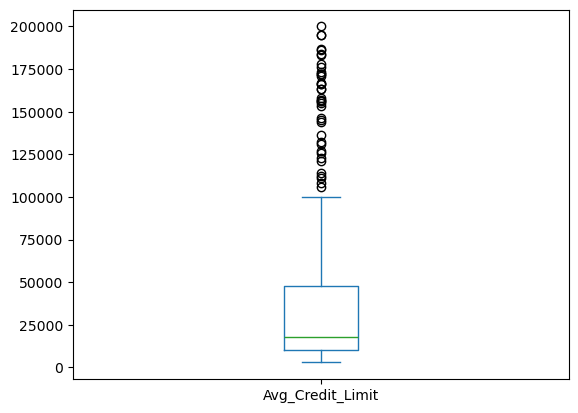

In [11]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah Bari DataFrame Sebelum Dibuat Outlier 660
Jumlah baris DataFrame Sesdudah Dibuang Outlier 621


<Axes: >

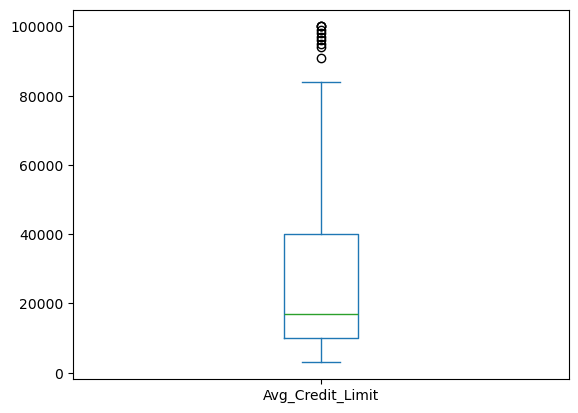

In [14]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in, col_name):
    df_out = df_in.copy()
    if is_numeric_dtype(df_in[col_name]):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = df_in.loc[(df_in[col_name] >= batas_bawah) & (df_in[col_name] <= batas_atas)]
    return df_out

data_bersih = remove_outlier(df_credit, "Avg_Credit_Limit")
print("Jumlah Bari DataFrame Sebelum Dibuat Outlier", df_credit.shape[0])
print("Jumlah baris DataFrame Sesdudah Dibuang Outlier", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

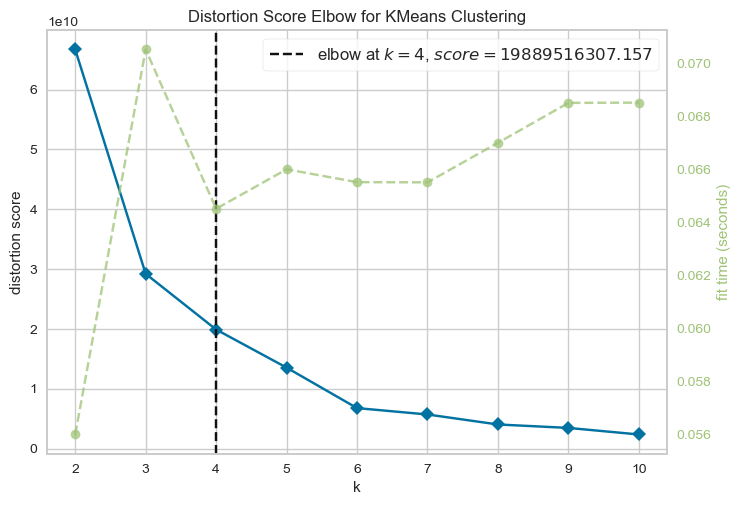

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeanC = KMeans(random_state=65)
vis = KElbowVisualizer(kMeanC, k=(2,11))
df_clean = data_bersih
vis.fit(data_bersih)

vis.show()

Silhouette score K_Means for  2  cluster : 0.7275517813087928
Silhouette score K_Means for  3  cluster : 0.7077390094589705
Silhouette score K_Means for  4  cluster : 0.6783832492476802
Silhouette score K_Means for  5  cluster : 0.6019875359940078
Silhouette score K_Means for  6  cluster : 0.6275885835827448
Silhouette score K_Means for  7  cluster : 0.5865635473828966
Silhouette score K_Means for  8  cluster : 0.6183107994229559
Silhouette score K_Means for  9  cluster : 0.6218673173687632
Silhouette score K_Means for  10  cluster : 0.6004595992360154


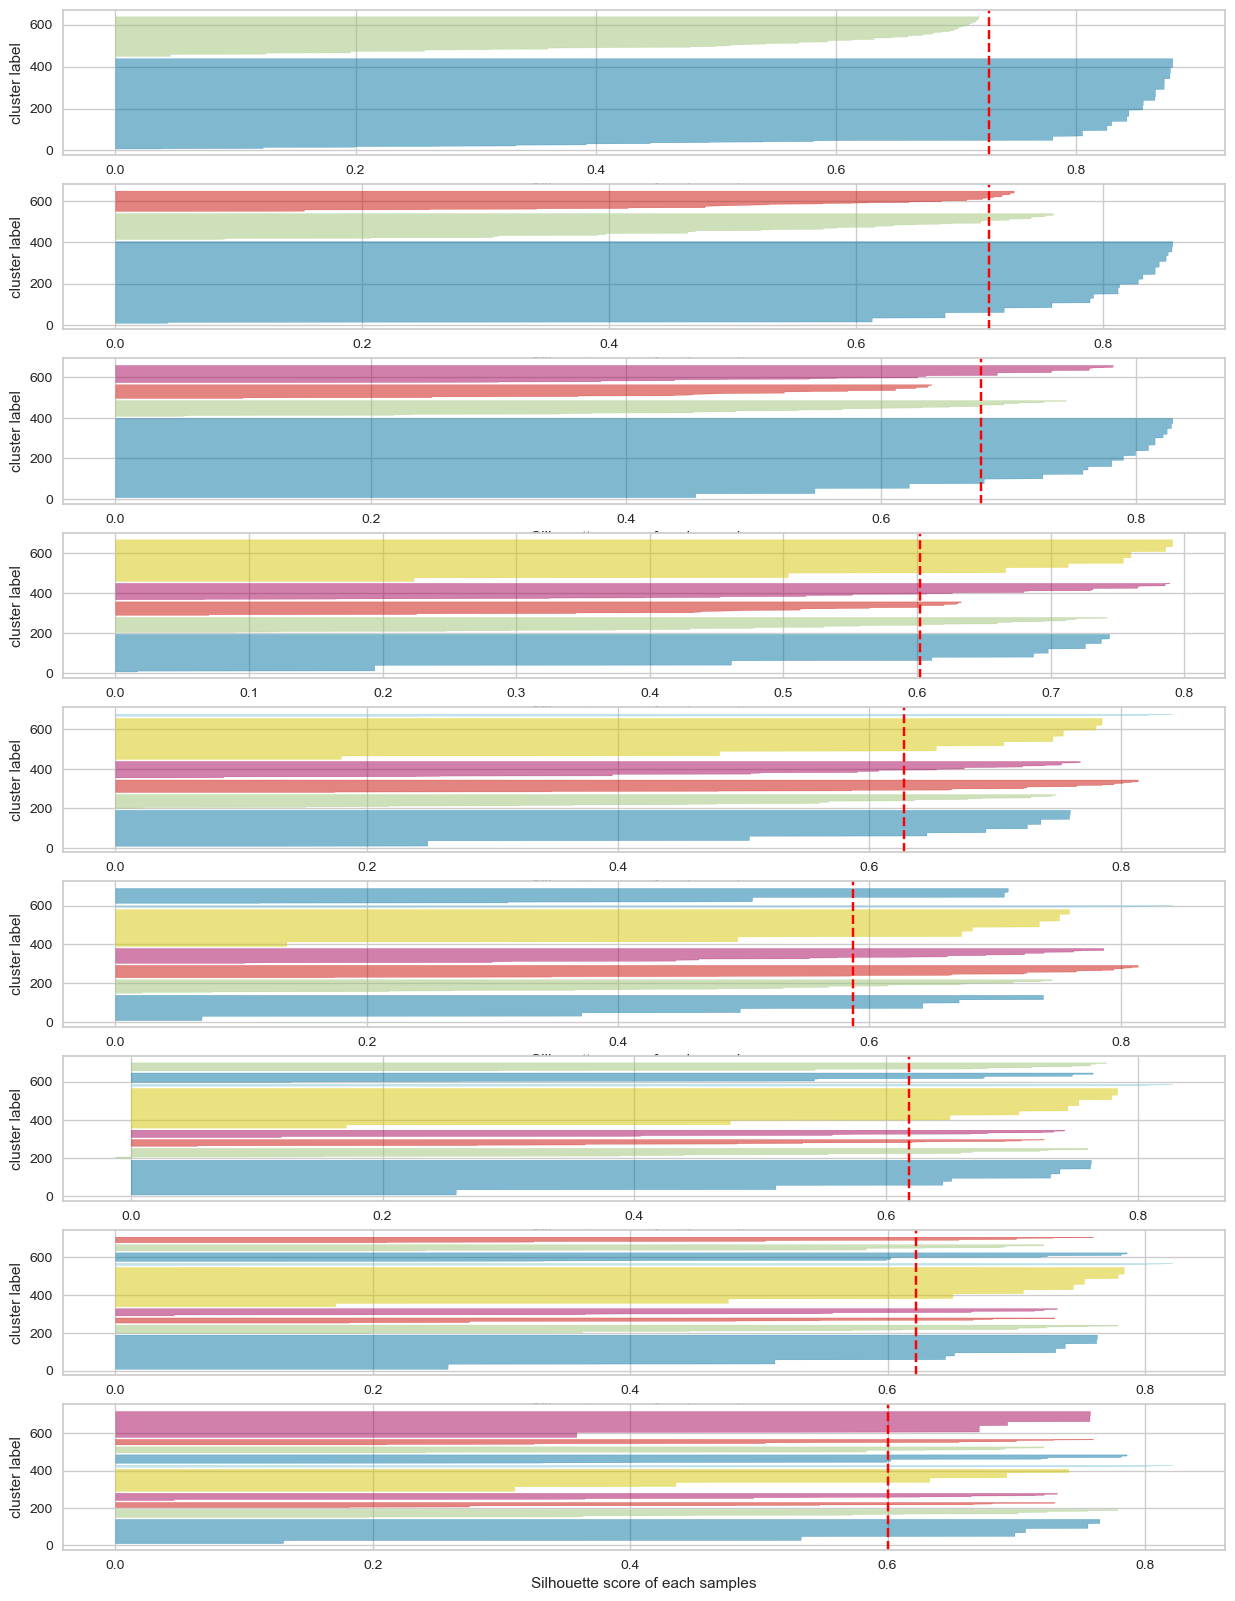

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=65)
    clean_data = data_bersih
    KM_cluster=kMeansC.fit_predict(clean_data)
    print("Silhouette score K_Means for ", k, " cluster :", silhouette_score(clean_data, KM_cluster))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(clean_data)

    ax[k-2].set(xlabel="Silhouette score of each samples", ylabel="cluster label")

In [45]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

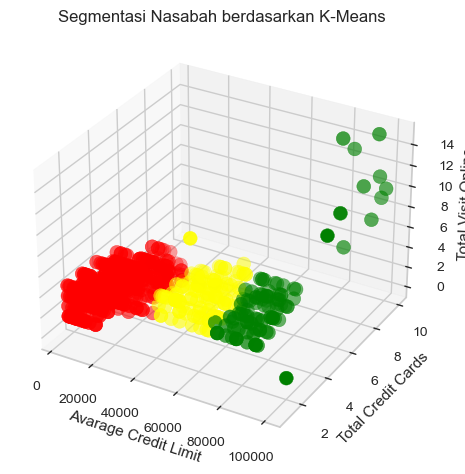

Silhouette Score K-Means: 0.708


In [48]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=65)
K_clusters = kmeans.fit_predict(data_bersih)


fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1:'yellow', 2:'green', 3:'blue', 4:'magenta', 5:'black', 6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Avarage Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visit Online')

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

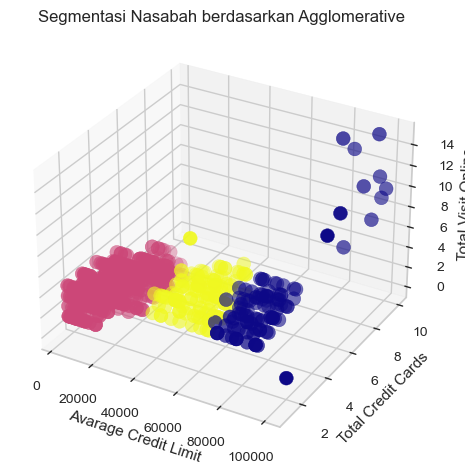

Silhouette Score K-Means: 0.705


In [49]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Avarage Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visit Online')

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

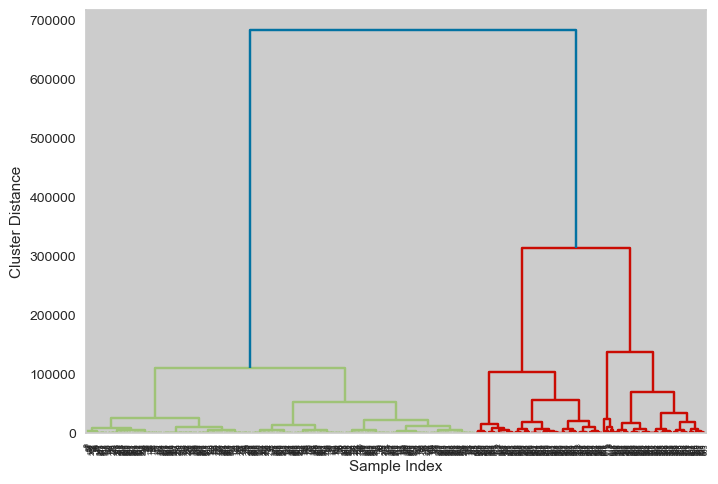

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

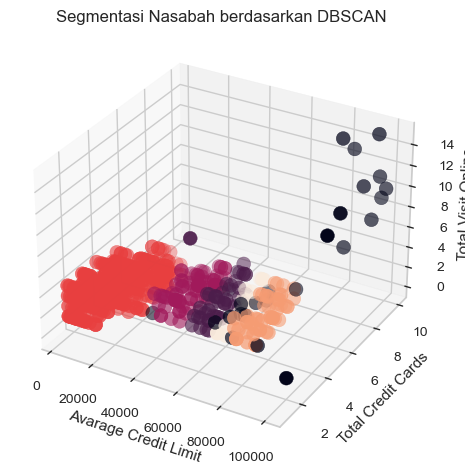

Silhouette Score K-Means: 0.657


In [52]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Avarage Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visit Online')

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))


In [54]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

    print("Model Berhasil disimpan")

Model Berhasil disimpan
